Aim: Implementation of dimensionality reduction techniques: Features Extraction and Selection, Normalization,Transformation, Principal Components Analysis.

Theory:

Feature Extraction and Selection:

Feature extraction is the process of transforming raw data into a set of meaningful and representative features that capture the essential characteristics of the data. It involves selecting relevant features from the input data and transforming them into a format that can be easily understood and processed by machine learning algorithms. Feature selection, on the other hand, aims to identify the most informative and discriminative features among the available set of features. This helps to reduce the dimensionality of the data, improve computational efficiency, and enhance the performance of machine learning models by focusing on the most relevant information.

Normalization:

Normalization is a data preprocessing technique used to bring different features or variables onto a common scale. It is important because features may have different units or ranges, which can lead to bias in the learning algorithm. Normalization ensures that each feature contributes equally to the learning process by scaling the values to a standardized range, typically between 0 and 1 or -1 and 1. Common normalization methods include min-max scaling and z-score normalization.

Transformation:

Transformation refers to the process of applying mathematical or statistical functions to the data to change its distribution or shape. Data transformation is often used to improve the underlying assumptions of statistical models or to make the data more amenable to analysis. Common transformations include logarithmic, exponential, square root, and power transformations. By transforming the data, it is possible to uncover hidden patterns or relationships that may not be apparent in the original form.

Principal Component Analysis (PCA):

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a dataset into a lower-dimensional space while retaining most of the important information. PCA identifies the principal components, which are linear combinations of the original variables, that explain the maximum amount of variance in the data. These principal components are ordered by the amount of variance they explain, with the first component explaining the most variance. By selecting a subset of the principal components, PCA allows for data compression, visualization, and noise reduction, while preserving the most significant patterns and structures present in the data.





In [1]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import pylab as pl

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = iris.data

X.shape

(150, 4)

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print (X_std[0:5])
print ("The shape of Feature Matrix is -",X_std.shape)

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
The shape of Feature Matrix is - (150, 4)


In [5]:
X_covariance_matrix = np.cov(X_std.T)

X_covariance_matrix

array([[ 1.007, -0.118,  0.878,  0.823],
       [-0.118,  1.007, -0.431, -0.369],
       [ 0.878, -0.431,  1.007,  0.969],
       [ 0.823, -0.369,  0.969,  1.007]])

In [6]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.521 -0.377 -0.72   0.261]
 [-0.269 -0.923  0.244 -0.124]
 [ 0.58  -0.024  0.142 -0.801]
 [ 0.565 -0.067  0.634  0.524]]

Eigenvalues 
[2.938 0.92  0.148 0.021]


In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
  print(i[0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.962  95.813  99.482 100.   ]


In [9]:
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
eig_pairs[1][1].reshape(4,1)))

All Eigen Values along with Eigen Vectors
[(2.938085050199995, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624864, array([-0.377, -0.923, -0.024, -0.067])),
 (0.1477418210449475, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.020853862176462696, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------


In [11]:
print ('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.521 -0.377]
 [-0.269 -0.923]
 [ 0.58  -0.024]
 [ 0.565 -0.067]]


In [12]:
Y = X_std.dot(matrix_w)
print (Y[0:5])

[[-2.265 -0.48 ]
 [-2.081  0.674]
 [-2.364  0.342]
 [-2.299  0.597]
 [-2.39  -0.647]]


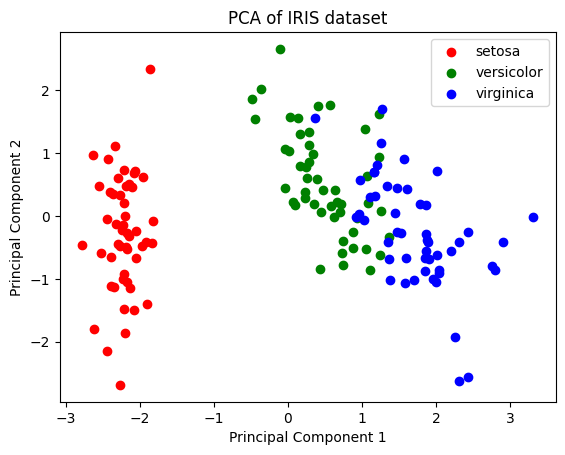

In [13]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
  pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()

Conclusions:
We have successfully implmented dimensionality reduction techniques: Features Extraction and Selection, Normalization,Transformation, Principal Components Analysis.